In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("houses_to_rent_comb_cleaned.csv")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14196 entries, 0 to 14195
Data columns (total 12 columns):
city              14196 non-null object
area              14196 non-null int64
rooms             14196 non-null int64
bathroom          14196 non-null int64
parking spaces    14196 non-null int64
floor             14196 non-null int64
animal            14196 non-null object
furniture         14196 non-null object
Hassoc_tax        14196 non-null int64
rent              14196 non-null int64
prop_tax          14196 non-null int64
fire_insur        14196 non-null int64
dtypes: int64(9), object(3)
memory usage: 1.3+ MB


In [24]:
df.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,Hassoc_tax,rent,prop_tax,fire_insur
0,city1,240,3,3,4,0,acept,furnished,0,8000,1000,121
1,city0,64,2,1,1,10,acept,not furnished,540,820,122,11
2,city1,73,2,2,1,12,acept,not furnished,700,1250,150,16
3,city1,19,1,1,0,0,not acept,not furnished,0,1200,41,16
4,city1,13,1,1,0,2,acept,not furnished,0,2200,42,28
5,city1,55,1,1,1,2,acept,furnished,1950,5000,375,64
6,city1,55,2,2,1,2,acept,not furnished,600,1300,67,17
7,city1,82,3,1,1,3,acept,furnished,828,2000,109,26
8,city1,32,1,1,1,16,acept,not furnished,533,2900,0,37
9,city0,60,1,1,0,6,acept,not furnished,480,720,20,10


In [25]:
df.describe()

,area,rooms,bathroom,parking spaces,floor,Hassoc_tax,rent,prop_tax,fire_insur
count,14196.000000,14196.000000,14196.000000,14196.000000,14196.000000,1.419600e+04,14196.000000,14196.000000,14196.000000
mean,110.701747,2.349465,2.023950,1.408143,5.439067,9.471729e+02,3277.212877,313.273246,43.590871
std,74.095685,1.026980,1.165183,1.299286,5.983165,9.438541e+03,2307.681145,4845.985170,31.227786
min,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,420.000000,0.000000,3.000000
25%,55.000000,2.000000,1.000000,1.000000,1.000000,2.500000e+02,1550.000000,30.000000,20.000000
50%,85.000000,2.000000,2.000000,1.000000,4.000000,6.000000e+02,2500.000000,110.000000,33.000000
75%,150.000000,3.000000,3.000000,2.000000,8.000000,1.200000e+03,4250.000000,300.000000,58.000000
max,339.000000,8.000000,8.000000,10.000000,301.000000,1.117000e+06,11050.000000,366300.000000,181.000000


Histograms

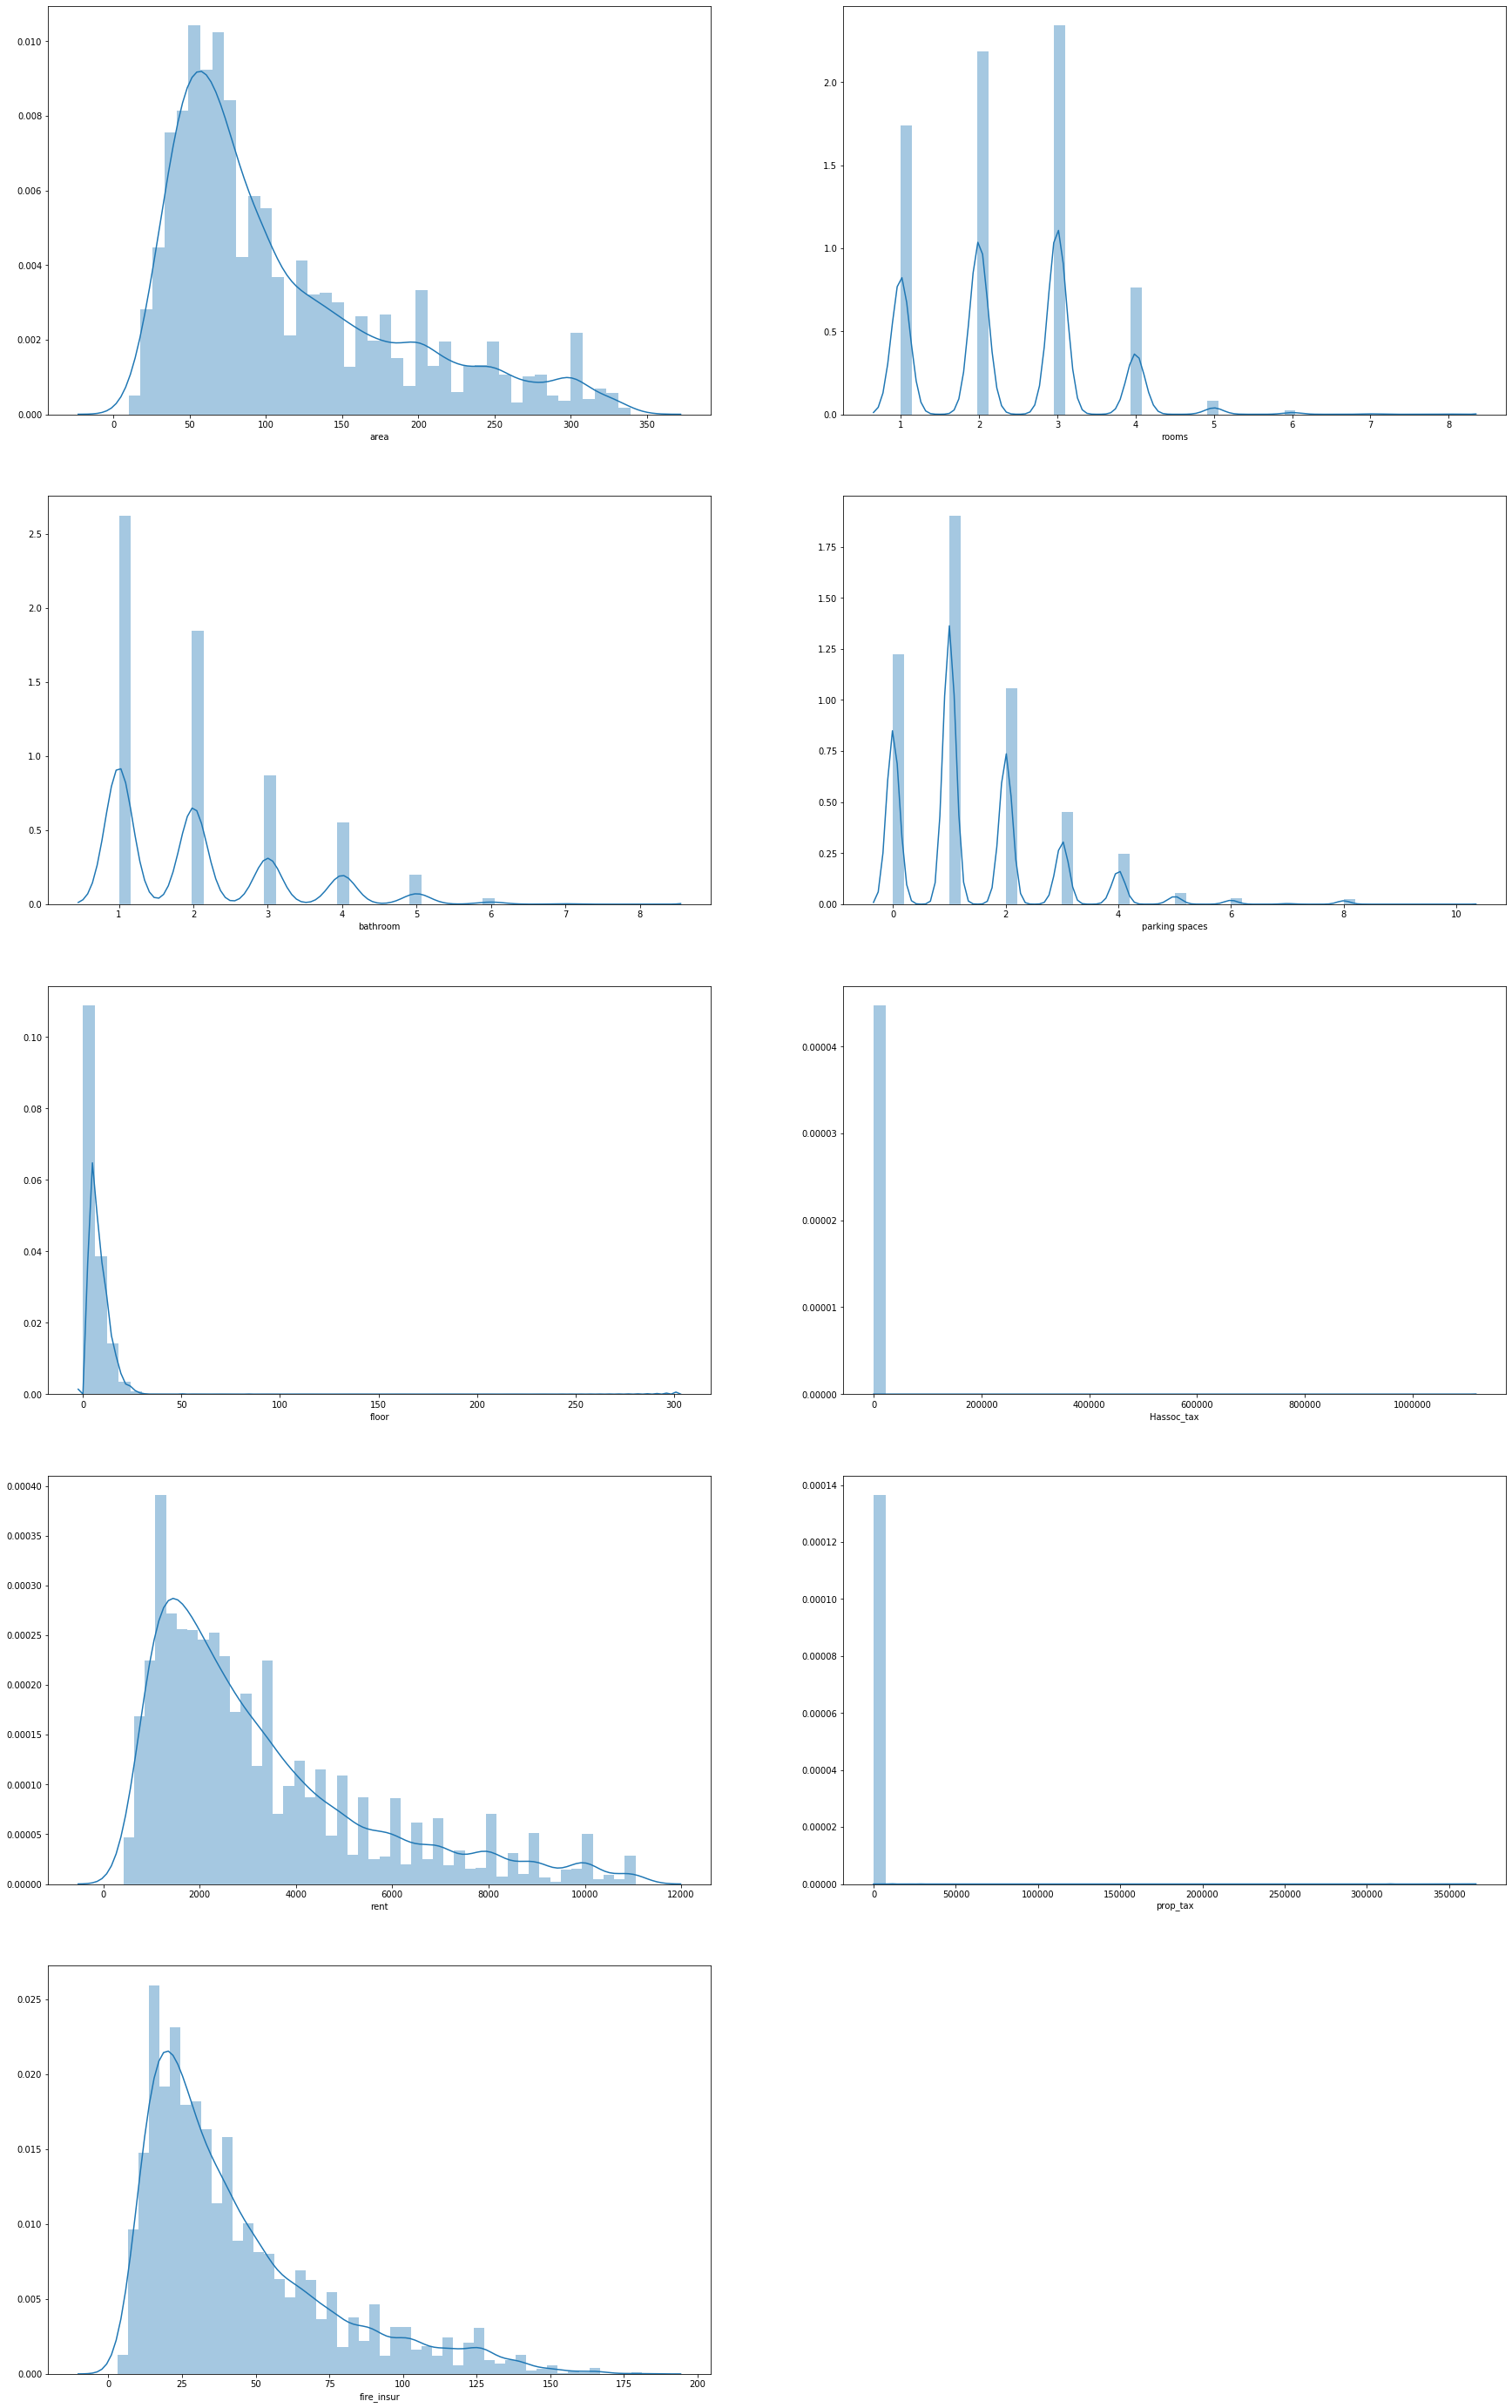

In [14]:
col = df.describe().columns
plt.figure(figsize = (30,50))
for i,var in enumerate(col,1):
    plt.subplot(5,2,i)
    f = sns.distplot(df[var])
    f.set_xlabel(var)

In [15]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'Hassoc_tax', 'rent', 'prop_tax', 'fire_insur'],
      dtype='object')

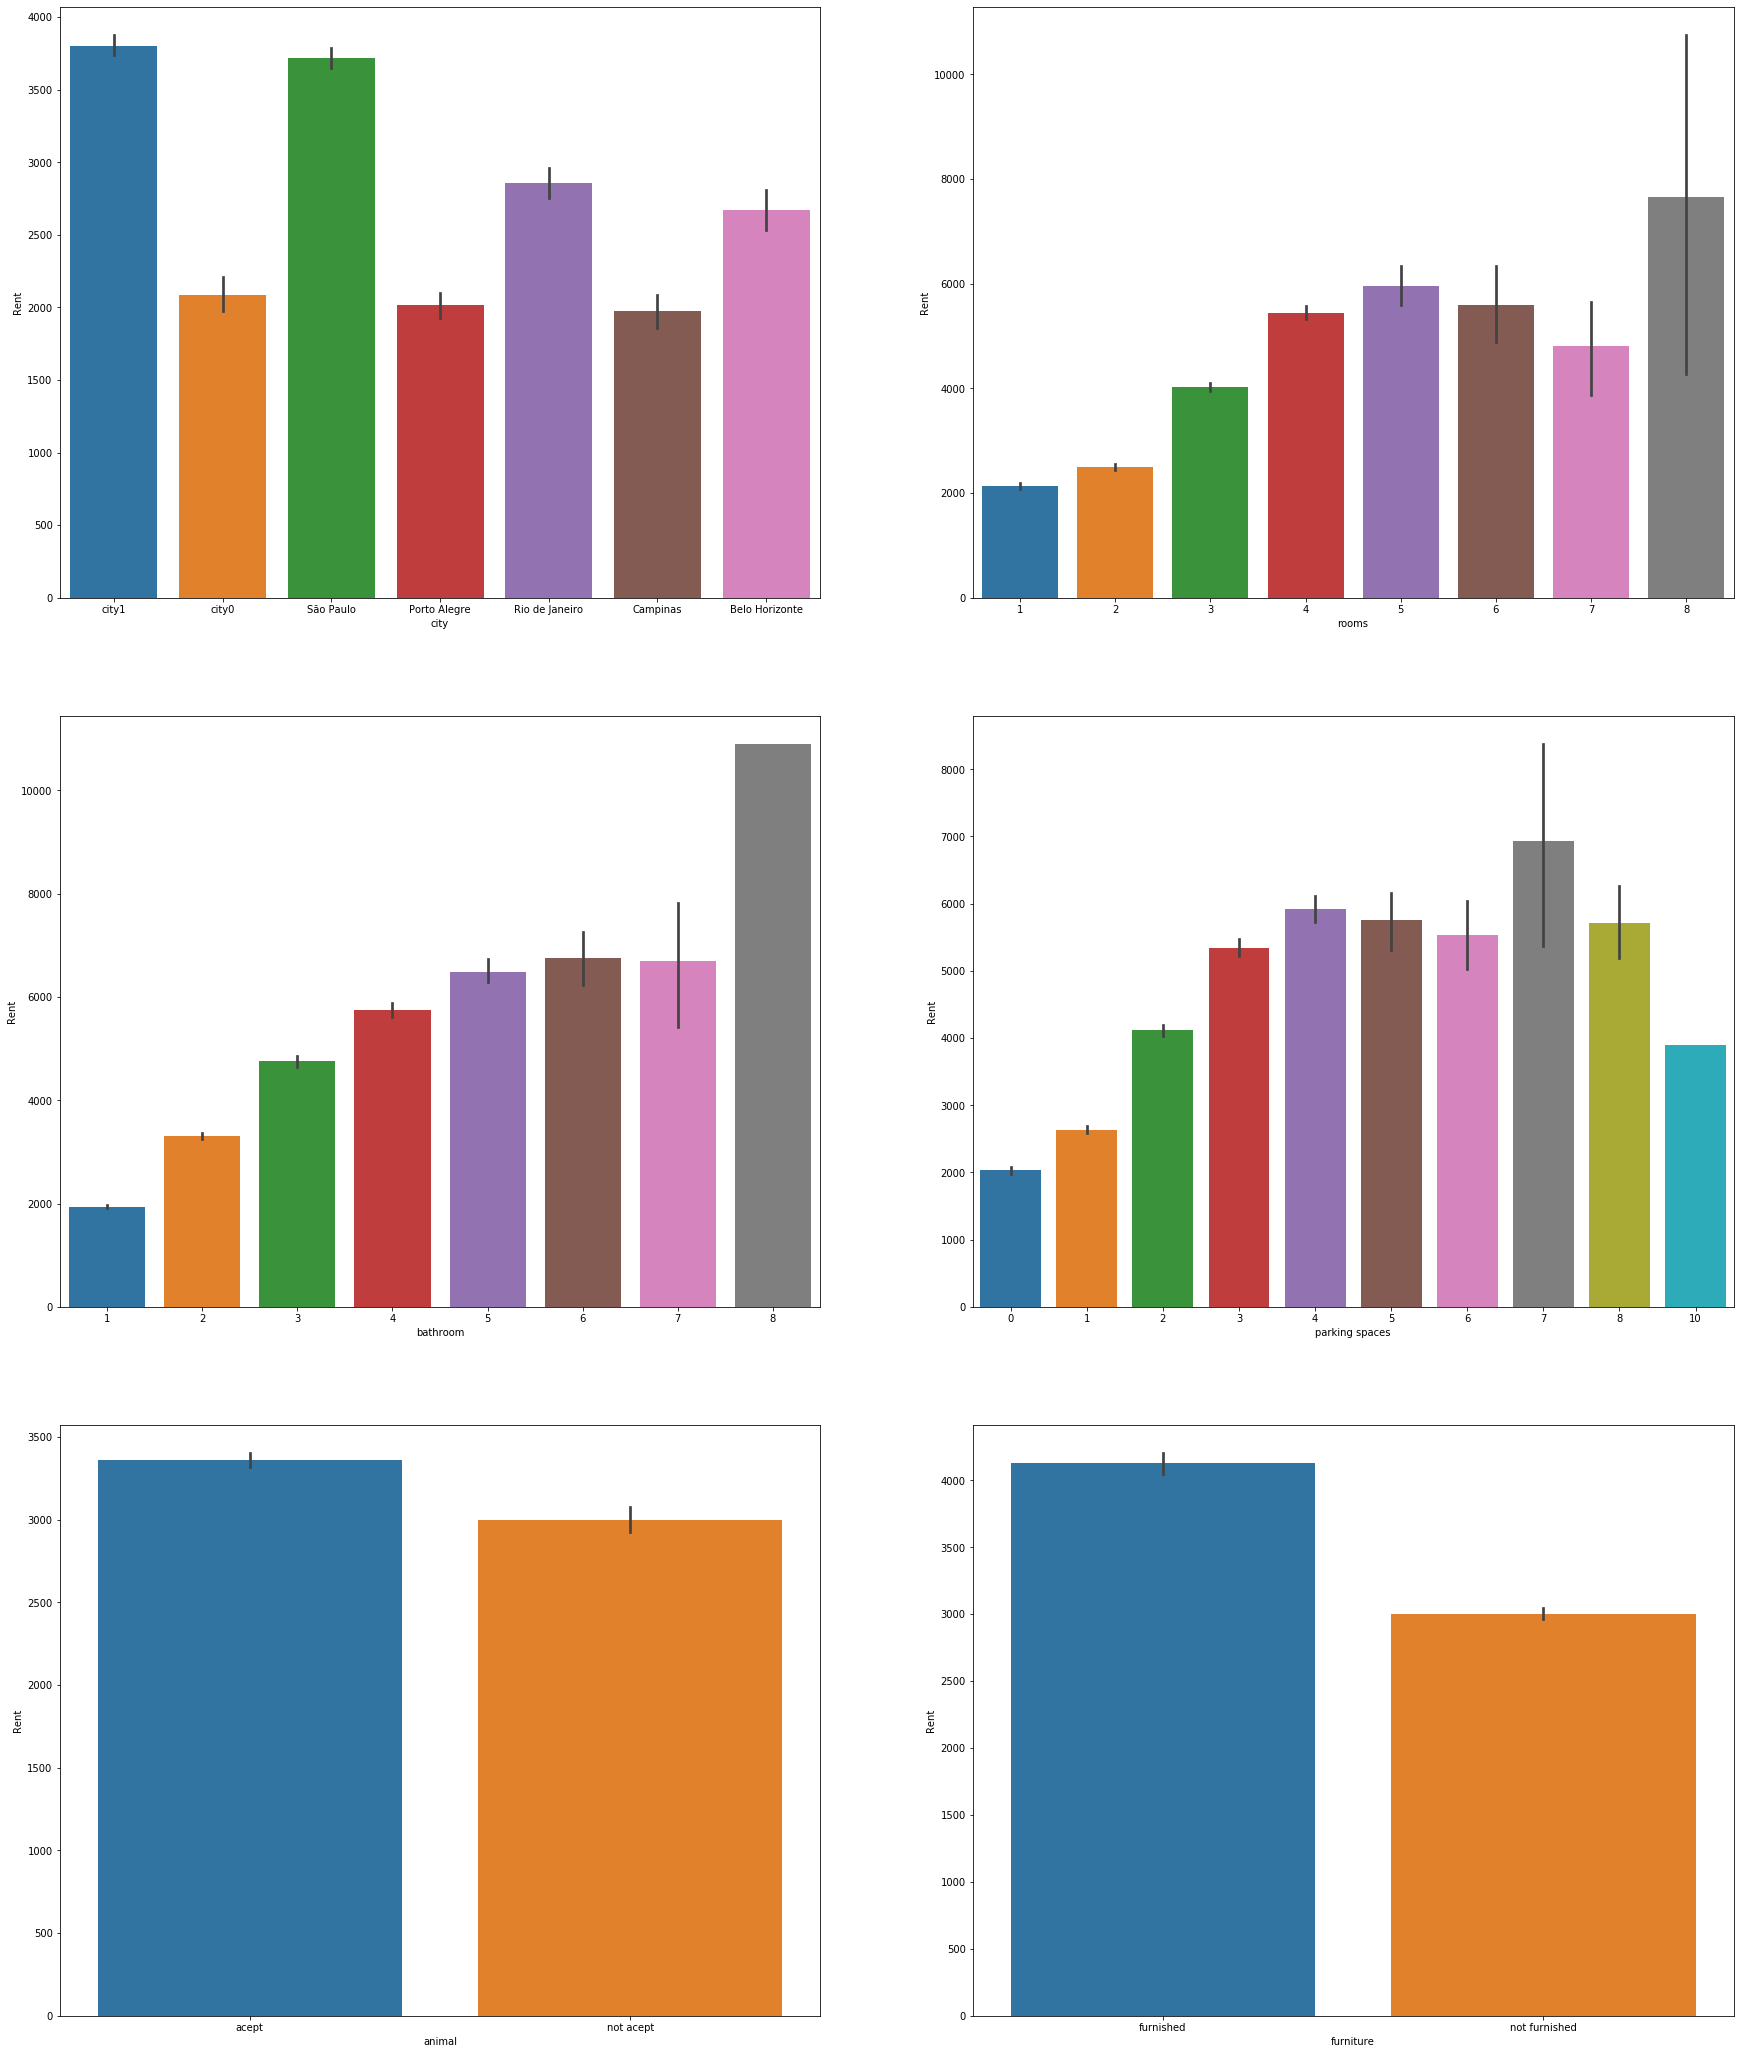

In [22]:
col1 = ['city', 'rooms', 'bathroom', 'parking spaces', 'animal', 'furniture']
plt.figure(figsize = (30,50))
for i,var in enumerate(col1,1):
    plt.subplot(4,2,i)
    f = sns.barplot(x = df[var], y = df["rent"])
    f.set_xlabel(var)
    f.set_ylabel("Rent")

Correlation

In [102]:
df.describe().columns

Index(['area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'Hassoc_tax',
       'rent', 'prop_tax', 'fire_insur'],
      dtype='object')

In [103]:
df[df.describe().columns].corr()

,area,rooms,bathroom,parking spaces,floor,Hassoc_tax,rent,prop_tax,fire_insur
area,1.000000,0.736734,0.757871,0.654053,-0.066539,0.044461,0.631287,0.034425,0.663586
rooms,0.736734,1.000000,0.691815,0.563867,-0.055091,0.020217,0.472141,0.025623,0.496654
bathroom,0.757871,0.691815,1.000000,0.641615,0.036820,0.058339,0.616257,0.046619,0.621827
parking spaces,0.654053,0.563867,0.641615,1.000000,0.013820,0.020978,0.507971,0.028365,0.528118
floor,-0.066539,-0.055091,0.036820,0.013820,1.000000,0.026217,0.143763,0.016942,0.078707
Hassoc_tax,0.044461,0.020217,0.058339,0.020978,0.026217,1.000000,0.046292,0.004919,0.038964
rent,0.631287,0.472141,0.616257,0.507971,0.143763,0.046292,1.000000,0.040569,0.981512
prop_tax,0.034425,0.025623,0.046619,0.028365,0.016942,0.004919,0.040569,1.000000,0.038917
fire_insur,0.663586,0.496654,0.621827,0.528118,0.078707,0.038964,0.981512,0.038917,1.000000


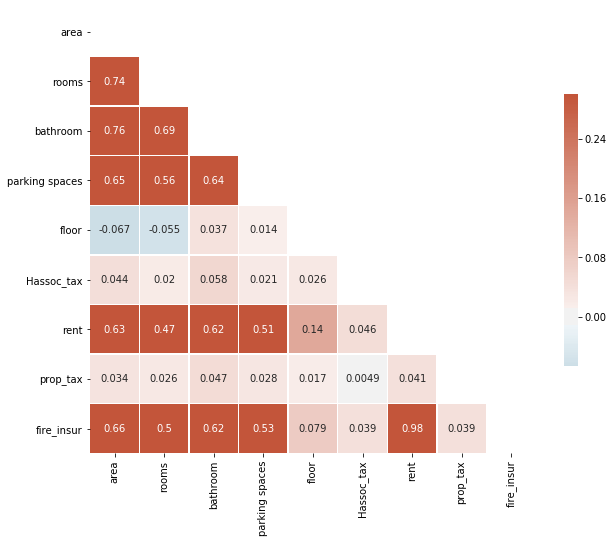

In [104]:
corr = df[df.describe().columns].corr()

plt.figure(figsize=(10, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap,square=True,vmax=0.3,center=0,linewidths=0.5,cbar_kws={'shrink':0.5})

* https://www.kaggle.com/salmanhiro/mesmo-problema-house-rent-eda#Total-Price-Distribution
* https://www.kaggle.com/tamilsel/predicting-the-house-cost-eda

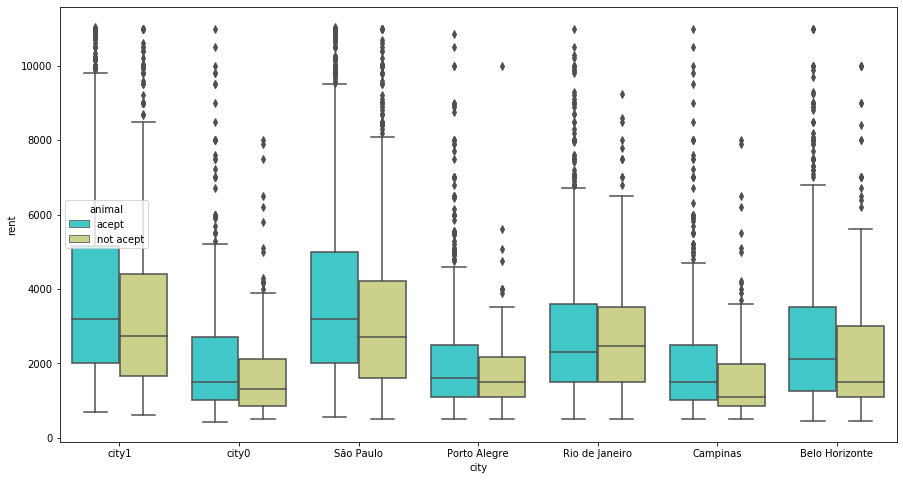

In [33]:
plt.figure(figsize=(15,8))
sns.boxplot(x='city',y='rent',data=df,palette='rainbow',hue='animal')

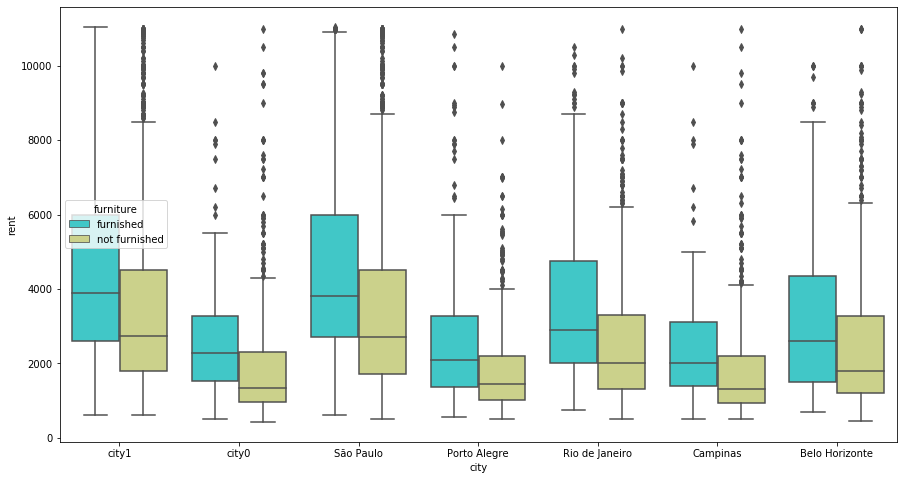

In [34]:
plt.figure(figsize=(15,8))
sns.boxplot(x='city',y='rent',data=df,palette='rainbow',hue='furniture')

In [47]:
pd.pivot_table(df,index='city',values = 'rent', columns = 'animal',aggfunc='mean')

animal,acept,not acept
city,,
Belo Horizonte,2804.872312,2313.054545
Campinas,2049.185366,1668.540000
Porto Alegre,2050.397231,1784.555556
Rio de Janeiro,2870.202590,2815.511029
São Paulo,3848.517045,3305.560231
city0,2155.455959,1814.812500
city1,3931.602568,3401.811268


In [44]:
pd.pivot_table(df,index='city',values = 'rent', columns = 'furniture',aggfunc='mean')

furniture,furnished,not furnished
city,,
Belo Horizonte,3426.216000,2566.709172
Campinas,2558.104762,1881.710606
Porto Alegre,2667.509225,1797.155907
Rio de Janeiro,3594.910811,2582.289929
São Paulo,4489.617284,3436.299557
city0,2775.963636,1964.088091
city1,4559.076603,3511.244019


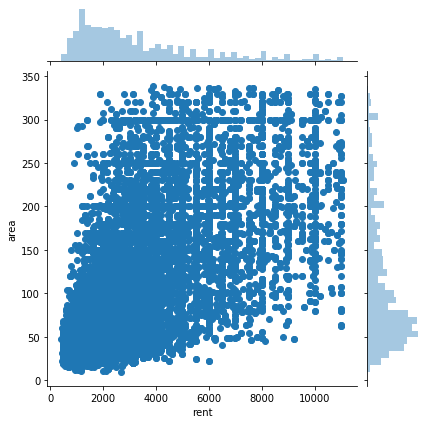

In [57]:
sns.jointplot(df['rent'],df['area'])

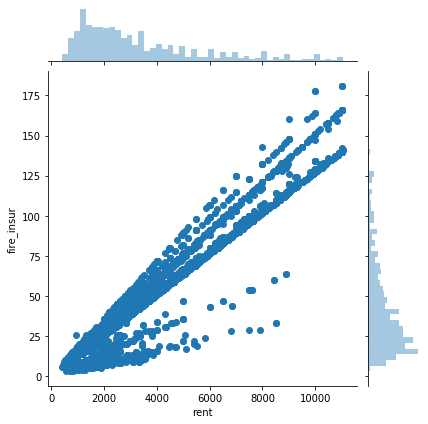

In [59]:
sns.jointplot(df['rent'],df['fire_insur'])

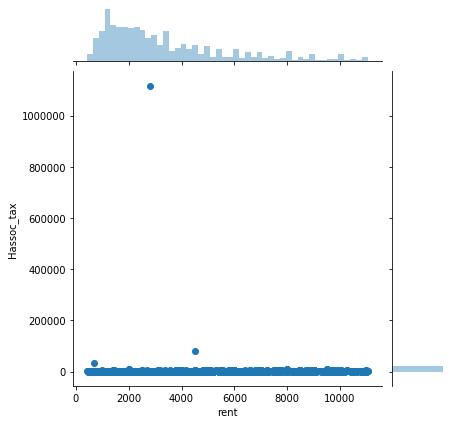

In [58]:
sns.jointplot(df['rent'],df['Hassoc_tax'])

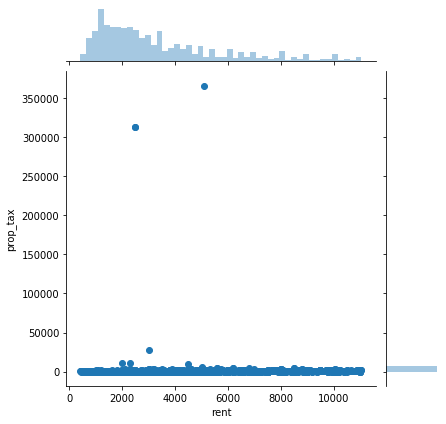

In [62]:
sns.jointplot(df['rent'],df['prop_tax'])